# <a id='toc1_'></a>[Time Series Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Time Series Analysis](#toc1_)    
  - [I. Data Import](#toc1_1_)    
  - [II. Data Overview](#toc1_2_)    
  - [III. API Configuration & Data Subsetting and Wrangling](#toc1_3_)    
    - [III.1. API configuration](#toc1_3_1_)    
    - [III.2. Data subsetting](#toc1_3_2_)    
    - [III.3. Data wrangling](#toc1_3_3_)    
  - [IV. Time-Series Analysis: Decomposition](#toc1_4_)    
    - [IV.1. Test for stationarity](#toc1_4_1_)    
    - [IV.2. Stationarizing the data](#toc1_4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[I. Data Import](#toc0_)

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [3]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## <a id='toc1_2_'></a>[II. Data Overview](#toc0_)

In [4]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# check number of rows and columns
df.shape

(6860, 29)

In [11]:
# check columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month', 'salary_category'],
      dtype='object')

In [5]:
# check outputs of df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [9]:
# check column survey_year
df['survey_year'].value_counts()

2018    3088
2017    2893
2019     879
Name: survey_year, dtype: int64

In [123]:
# check column timestamp
df['timestamp'].value_counts()

2017-01-05 11:13:26    3
2017-01-05 12:03:55    3
2017-01-05 11:48:25    2
2017-01-09 08:30:55    2
2018-12-21 16:49:48    2
                      ..
2017-01-09 12:48:09    1
2017-01-09 12:47:14    1
2017-01-09 12:46:06    1
2017-01-09 12:44:25    1
2019-01-05 18:25:22    1
Name: timestamp, Length: 6781, dtype: int64

In [10]:
# check column month as it is a derived column from timestamps
df['month'].value_counts()

12    3650
1     3210
Name: month, dtype: int64

**Observation:**

There are time variables in the data, however, the dataset is not sufficient to qualify as a time series data because it has only a few time points.

## <a id='toc1_3_'></a>[III. API Configuration & Data Subsetting and Wrangling](#toc0_)

### <a id='toc1_3_1_'></a>[III.1. API configuration](#toc0_)

In [12]:
# configure API key
quandl.ApiConfig.api_key = 'KLBzymmzykQms3wBGr2N'

**Observation:**

I have chosen stock market index S&P 500 as the main indicator to complement the analysis. Data on the stock market can provide information on the overall economic performance of a country, and potentially indicate trends in business activity and investment that can impact salaries.

In [24]:
# load the data
data = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH")

In [25]:
data

,Value
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86
...,...
2023-01-01,3944.01
2023-01-31,4076.60
2023-02-01,4119.21


In [26]:
data.shape

(1857, 1)

In [27]:
data.columns

Index(['Value'], dtype='object')

In [28]:
type(data)

pandas.core.frame.DataFrame

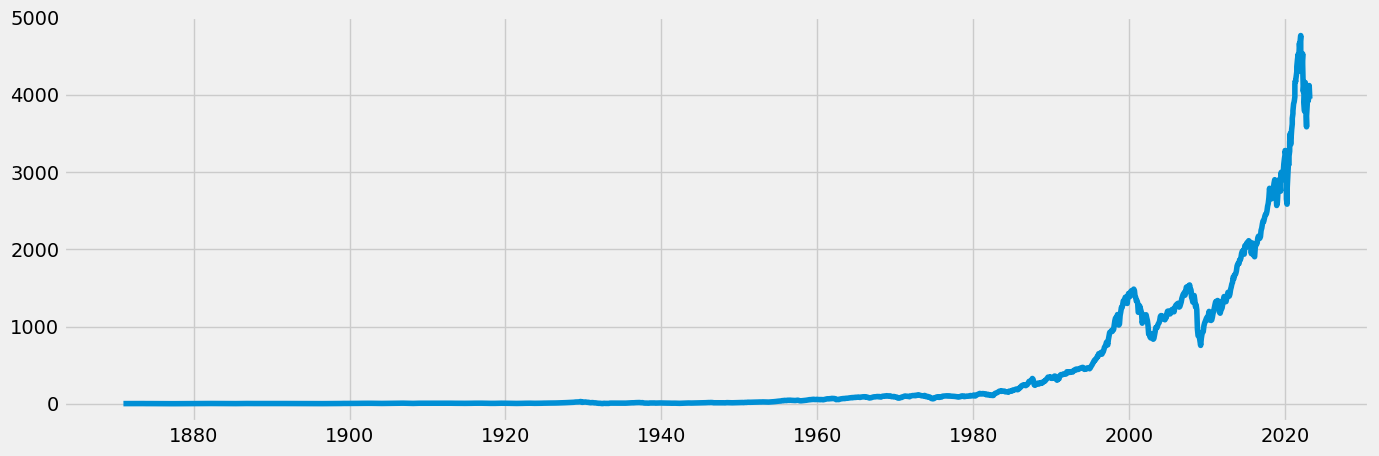

In [31]:
# plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### <a id='toc1_3_2_'></a>[III.2. Data subsetting](#toc0_)

In [32]:
# reset index to use the 'Date' column as a filter
data_2 = data.reset_index()

In [33]:
data_2.head()

,Date,Value
0,1871-01-01,4.44
1,1871-02-01,4.50
2,1871-03-01,4.61
3,1871-04-01,4.74
4,1871-05-01,4.86


In [35]:
data_2.tail()

,Date,Value
1852,2023-01-01,3944.01
1853,2023-01-31,4076.60
1854,2023-02-01,4119.21
1855,2023-02-28,3970.15
1856,2023-03-01,3951.39


To complement the analysis on the salary of data professionals worldwide from 2017 to 2019, it is ideal to have time series data on the S&P 500 that goes back at least 5 years.

At the same time, the last timestamp in the main data set is on 05 January 2019, and everything after is a prediction, therefore, data from 6 January 2019 onwards is also excluded.

In [124]:
data_sub = data_2.loc[(data_2['Date'] >= '2010-01-01') & (data_2['Date'] < '2019-01-06')]

In [125]:
data_sub.shape

(109, 2)

In [126]:
data_sub.head()

,Date,Value
1668,2010-01-01,1123.58
1669,2010-02-01,1089.16
1670,2010-03-01,1152.05
1671,2010-04-01,1197.32
1672,2010-05-01,1125.06


In [127]:
# set the 'Date column as the index
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # create a datetime column from 'Date'
data_sub = data_sub.set_index('datetime') # set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # drop the 'Date' column'
data_sub.head()

,Value
datetime,
2010-01-01,1123.58
2010-02-01,1089.16
2010-03-01,1152.05
2010-04-01,1197.32
2010-05-01,1125.06


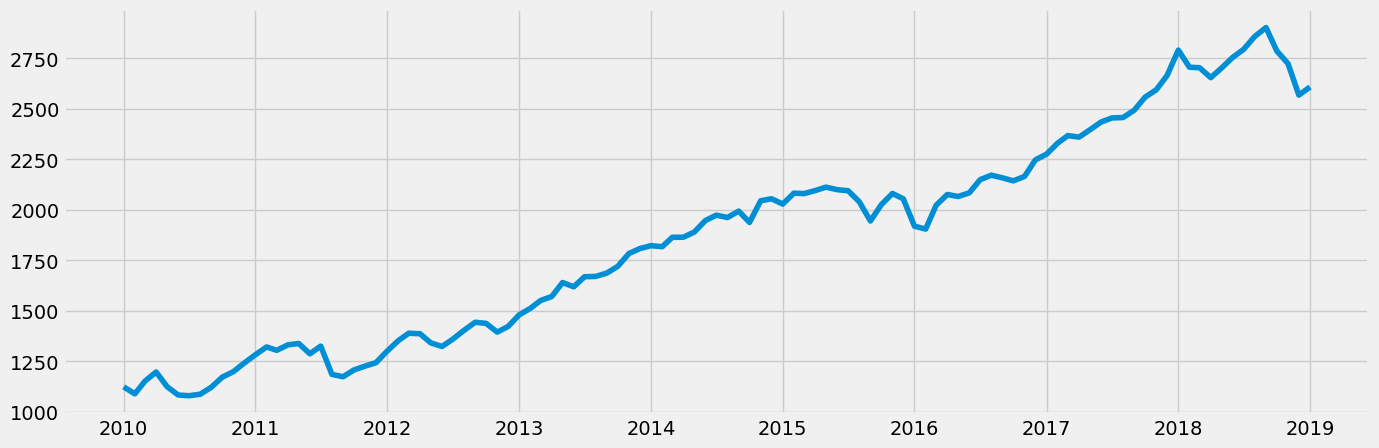

In [128]:
# plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### <a id='toc1_3_3_'></a>[III.3. Data wrangling](#toc0_)

In [129]:
# check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [130]:
# check for duplicates
dups = data_sub.duplicated()
dups.sum()

0

## <a id='toc1_4_'></a>[IV. Time-Series Analysis: Decomposition](#toc0_)

In the case of the S&P 500 prices, it is generally assumed that the seasonality is constant throughout the entire series, and it does not increase or decrease with the level of the series. Additionally, in the given data, the magnitude of the changes in the series does not increase or decrease with the level of the series, which is another indication that an additive model may be more appropriate. Therefore, it is more appropriate to use an additive model for decomposing this time series.

In [131]:
# decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [132]:
from pylab import rcParams # this will define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

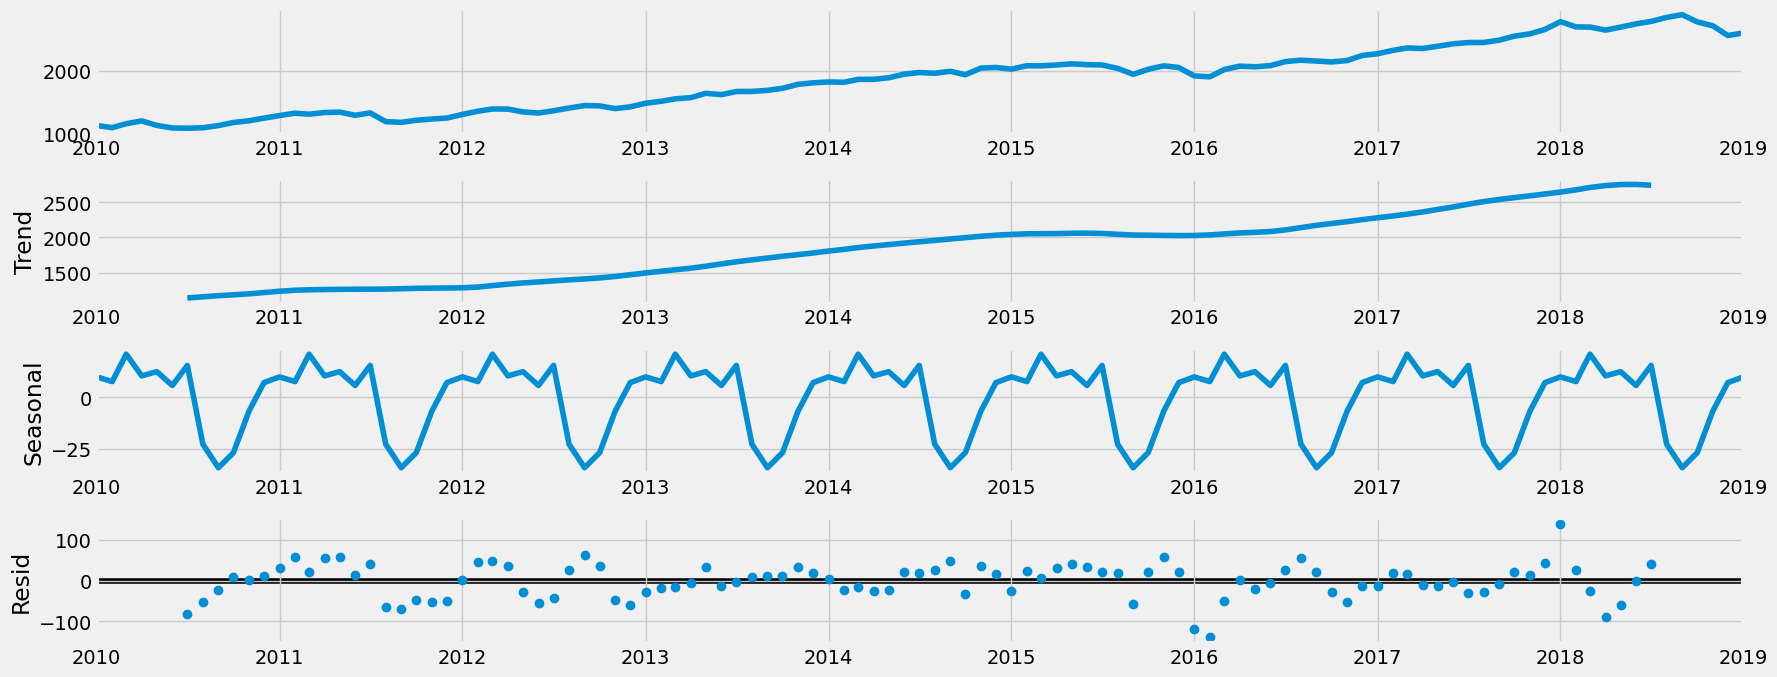

In [133]:
# plot the separate components
decomposition.plot()
plt.show()

**Observation:** The time series data appears to have a clear trend and seasonality:

- The trend can be seen as a gradual increase in the value of the data from 2007 to 2015, with some fluctuations along the way.

- The seasonality can be seen as a repeating pattern of peaks and troughs within each year, with higher values generally observed during the summer months and lower values during the winter months.

- There is also some noise in the data, particularly towards the end of the time series where the values seem to fluctuate more widely. Overall, however, the trend and seasonality appear to be the dominant patterns in the data.

### <a id='toc1_4_1_'></a>[IV.1. Test for stationarity](#toc0_)

In [134]:
# the adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers; this is why you need to also define a function that prints the correct output from that array

from statsmodels.tsa.stattools import adfuller # import the adfuller() function

# define the function
def dickey_fuller(timeseries): 
    # perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.48
p-value                         0.90
Number of Lags Used             0.00
Number of Observations Used   108.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64


**Observation:**

The test statistic is -0.48, which is greater than the critical values at all significance levels (1%, 5%, and 10%). This indicates that we cannot reject the null hypothesis of non-stationarity in the data.

The p-value is 0.90, which is much greater than the commonly used significance level of 0.05. This also indicates that we cannot reject the null hypothesis of non-stationarity.

Overall, the Dickey-Fuller test suggests that the time series data is non-stationary.

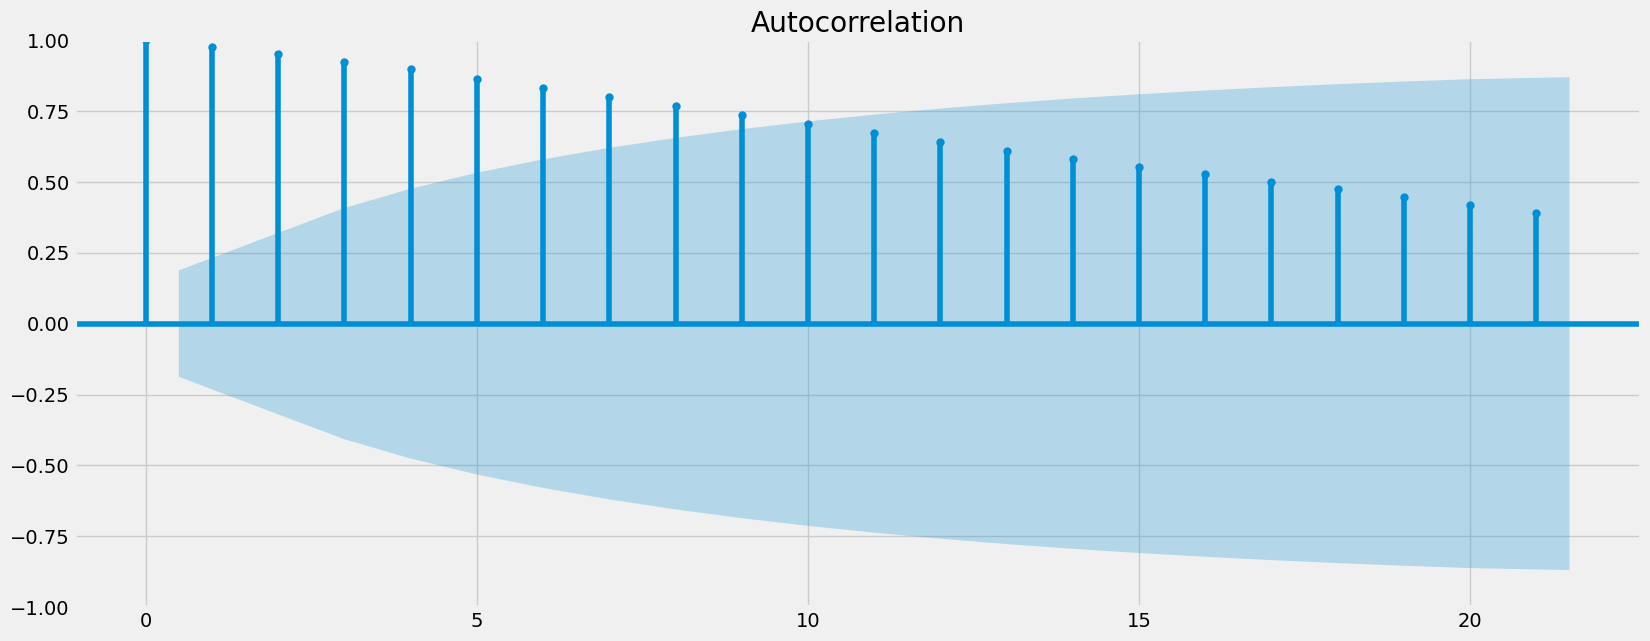

In [135]:
# check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

**Observation:**

Based on the autocorrelation plot, half of the data contains lags that are significantly correlated with each other. This is a sign of non-stationarity in the data, as the statistical properties of the data change over time.

### <a id='toc1_4_2_'></a>[IV.2. Stationarizing the data](#toc0_)

In [136]:
data_diff = data_sub - data_sub.shift(1) # the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [137]:
# remove the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True)

# need to remove these or you won't be able to run the Dickey-Fuller test

In [138]:
data_diff.head()

,Value
datetime,
2010-02-01,-34.42
2010-03-01,62.89
2010-04-01,45.27
2010-05-01,-72.26
2010-06-01,-41.70


In [139]:
data_diff.columns

Index(['Value'], dtype='object')

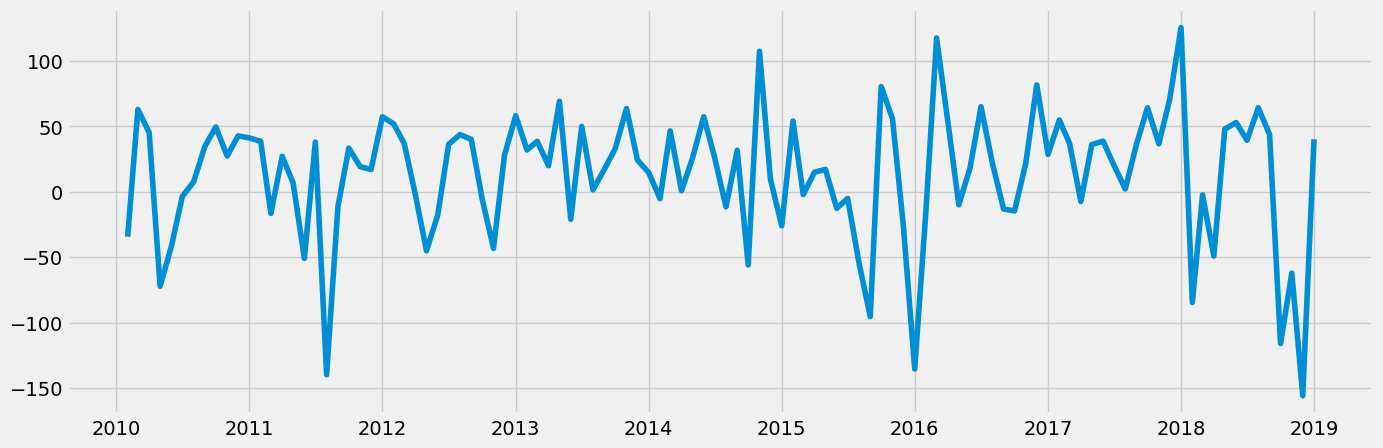

In [140]:
# check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [141]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -9.06
p-value                         0.00
Number of Lags Used             0.00
Number of Observations Used   107.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64


**Observation:**

The updated Dickey-Fuller Stationarity test shows that the time series data is now stationary with a high level of confidence.

The test statistic of -9.06 is much lower than the critical values at the 1%, 5%, and 10% levels, indicating that we can reject the null hypothesis that the data is non-stationary.

Additionally, the p-value is 0.00, which is less than the significance level of 0.05, further supporting the rejection of the null hypothesis.

Therefore, we can conclude that the stationarity transformation applied to the time series data was successful.

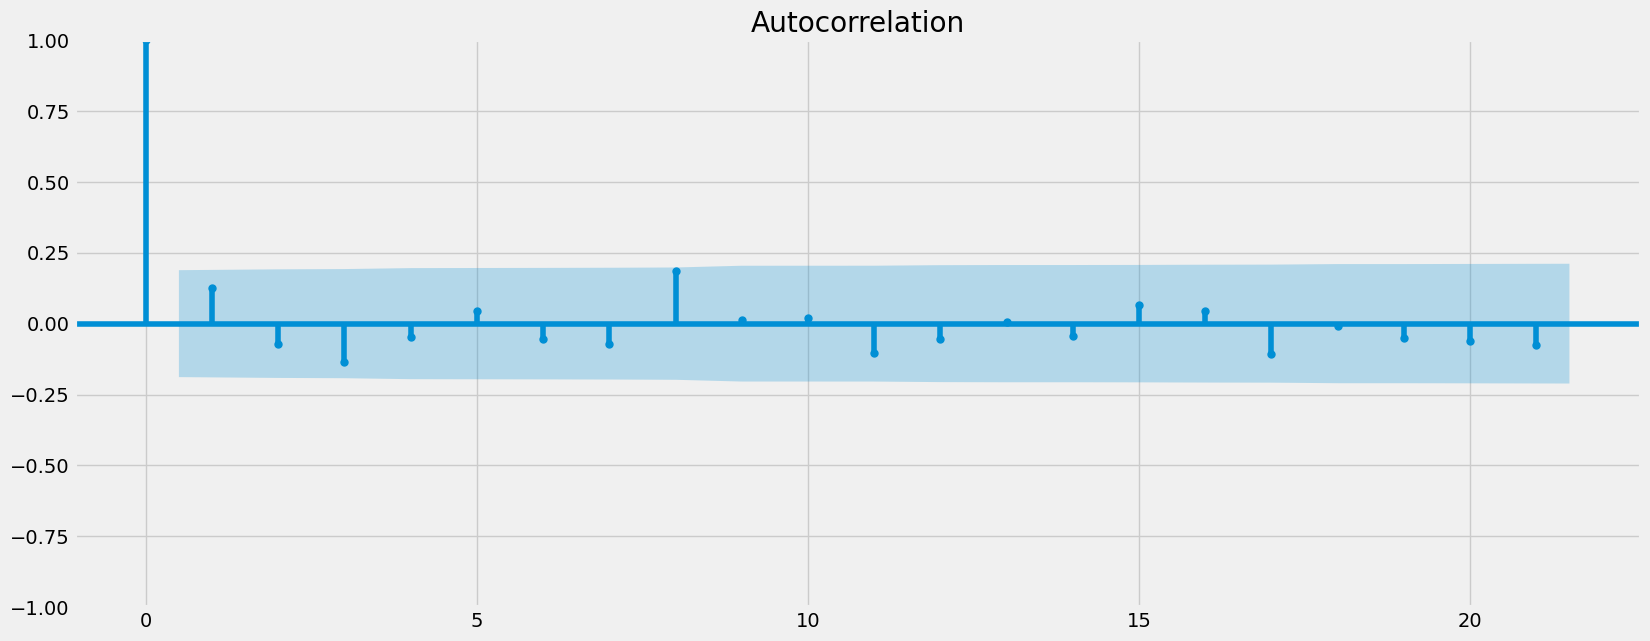

In [142]:
plot_acf(data_diff)
plt.show()

**Observation:**

The autocorrelation plot shows data being stationary except for a spike at lag one. This means that there is still some correlation between the observations at time zero and time one, which can be due to seasonality or other effects. However, as long as the autocorrelation values for other lags are within the confidence interval, the data can be considered stationary.